28 82 110
Result Accuracy fuzzy: 74.54545454545455 
 

Graphical representation of clusters 
 

 


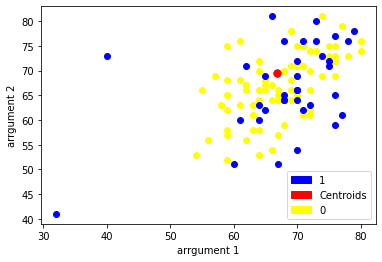

Conclusion Matrix


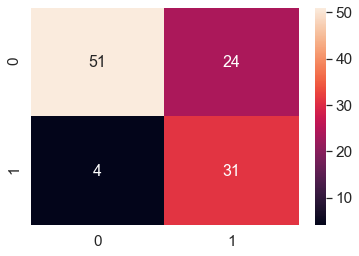

In [1]:
import csv
import random
import math
import copy
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def readCSV(filename):
	fields =[]
	records =[]
	with open(filename,"r") as csvFile:
		csvReader = csv.reader(csvFile)

		for row in csvReader:
			records.append(row)


	fields = records[0]
	records = records[1:]
	for i in range(len(records)):
		for j in range(len(records[0])):
			records[i][j] = float(records[i][j])
	return records


def dist(arr1, arr2):
    temp_dist = 0
    for i in range(len(arr1)):
        temp_dist = temp_dist + ((float(arr1[i])-float(arr2[i]))**2)


    temp_dist = temp_dist**(0.5)

    return temp_dist

def scalar(k, arr1):
    temp_prod=[]
    for i in range(len(arr1)):
        temp_prod.append(float(arr1[i])*k)

    return temp_prod

def vecAdd(arr1, arr2):
    temp_sum = list()
    for i in range(len(arr1)):
        temp_sum.append(float(arr1[i])+float(arr2[i]))

    return temp_sum

def vecDiff(arr1, arr2):
    diff = 0
    for i in range(len(arr1)):
        diff = diff+arr1[i]-arr2[i]

    return diff


def getAccuracy(centre, records, no_of_records):
    a1={}
    a1[0]=0
    a1[1]=1
    total=0
    correct1=0
    c1={}
    c1[0]=[]
    c1[1]=[]
    for x in records:
        total=total+1
        if dist(x[1:],centre[0])<=dist(x[1:],centre[1]):
            c1[0].append(x)
            if x[0]==0:
                correct1=correct1+1
        else:
            c1[1].append(x)
            if x[0]==1:
                correct1=correct1+1
    a2={}
    a2[0]=1
    a2[1]=0
    correct2=0
    c2={}
    c2[0]=[]
    c2[1]=[]
    for x in records:
        if dist(x[1:],centre[0])<=dist(x[1:],centre[1]):
            c2[0].append(x)
            if x[0]==1:
                correct2=correct2+1
        else:
            c2[1].append(x)
            if x[0]==0:
                correct2=correct2+1
    print(correct2,correct1,total)
    acc1=(correct1*1.0)/total
    acc2=(correct2*1.0)/total
    if acc1>=acc2:
        return [acc1,a1,c1]
    else:
        return [acc2,a2,c2]
def call(records,old_centroids,i,j,m):
    s=0
    a=dist(records[i][1:],old_centroids[j])
    
    for x in range(2):
        s=s+(a/dist(records[i][1:],old_centroids[x]))**(2/(m-1))
    return s



def fuzzyCMeans(c, m, no_of_attr, no_of_iter, records, no_of_records):
    old_centroids = [[random.randrange(0,90) for j in range(no_of_attr)] for i in range(c)]
    new_centroids = [[0 for j in range(no_of_attr)] for i in range(c)]

    membership_matrix = [[0 for j in range(c)] for i in range(no_of_records)]

#     for num in range(0, no_of_iter):
#         #print(num)
#         for i in range(0, no_of_records):

#             membership_matrix[i][0] = (1+(dist(records[i][1:], old_centroids[0])/dist(records[i][1:], old_centroids[1]))**(2/(m-1)))**(-1)
#             membership_matrix[i][1] = (1+(dist(records[i][1:], old_centroids[1])/dist(records[i][1:], old_centroids[0]))**(2/(m-1)))**(-1)
    for num in range(0, no_of_iter):
        for i in range(0, no_of_records):
            membership_matrix[i][0] = 1/call(records,old_centroids,i,0,2)
            membership_matrix[i][1] = 1/call(records,old_centroids,i,1,2)


        error =0
        for j in range(0, c):
            denom = 0
            numer = [0 for numb in range(no_of_attr)]
            for i in range(0, no_of_records):
                denom = denom+(membership_matrix[i][j]**m)
                numer = vecAdd(numer, scalar((membership_matrix[i][j]**m), records[i][1:]))

            if(denom==0):
                denom =1
                break

            denom = denom**(-1)
            new_centroids[j] = scalar(denom, numer)
            for x in new_centroids[j]:
                x = math.floor(x)

            error = vecDiff(new_centroids[j], old_centroids[j])


        old_centroids = copy.deepcopy(new_centroids)

        # if(num%10==0):
        #     print(getAccuracy(old_centroids, records, no_of_records))
#         if(error ==0):
#             print("Error 0")
#             return new_centroids, membership_matrix

    return new_centroids, membership_matrix
def draw(data,centres,c):
    a1=[]
    b1=[]
    a2=[]
    b2=[]
    for x in data[0]:
        a1.append(x[1])
        b1.append(x[2])
    for x in data[1]:
        a2.append(x[1])
        b2.append(x[2])
    red_patch = mpatches.Patch(color='red', label='Centroids')
    black = mpatches.Patch(color='yellow', label=str(c[0]))
    red_patc = mpatches.Patch(color='blue', label=str(c[1]))
    plt.legend(handles=[red_patc,red_patch,black])
    plt.scatter(a1,b1,color='yellow')
    plt.scatter(a2,b2,color='blue')
    plt.scatter([centres[0][1],centres[1][1]],[centres[0][2],centres[1][2]],s=50,c='red',label='Centroids')
    plt.xlabel('arrgument 1') 
    plt.ylabel('arrgument 2') 
    plt.show()


def main():
    filename = "SPECT.csv"
    records = readCSV(filename)

    c = 2
    m = 2
    no_of_iter = 100
    no_of_attr = len(records[0])-1
    no_of_records = len(records)
    centres, membership_matrix = fuzzyCMeans(c, m, no_of_attr, no_of_iter, records, no_of_records)
    accuracy = getAccuracy(centres, records, no_of_records)
    print("Result Accuracy fuzzy:",accuracy[0]*100,"\n \n")
    c=accuracy[1]
    d=accuracy[2]

    m=[[0,0]for x in range(2)]
    for x in d[0]:
        if x[0]==c[0]:
            m[0][0]=m[0][0]+1
        else:
            m[0][1]=m[0][1]+1
    for x in d[1]:
        if x[0]==c[1]:
            m[1][1]=m[1][1]+1
        else:
            m[1][0]=m[1][0]+1
    print("Graphical representation of clusters \n \n\n ")
    draw(d,centres,c)
    print("Conclusion Matrix")
    df_cm = pd.DataFrame(m, range(2), range(2))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.show()

if __name__ == '__main__':
    main()